# Лабораторная работа 5

### __Автор:__ Стецук Максим ИВТ 3 курс

В данной лабораторной работе мной была проведена обработка определенного диапазона данных из ЛР 4 с помощью специальных библиотек, реализованная в Jupyter Notebook.

### Выполненные задачи

1. Изначальный набор данных был разбит на 2 диапазона, причем 2 диапазон начинается с 3 недели;  
2. Второй диапазон (начинающийся с 3 недели) был разбит на тренировочную и тестовую выборки в соотношении 70% — тренировочная и 30% — тестовая выборки;
3. На основе тренировочной выборки построены модели для степеней полинома 1, 2, 3 на одной координатной плоскости;
4. Для построенных моделей найдены ошибки RMSE и MAE:
- Степень полинома 1: rmse = 376.0403076130898, mae = 289.8492660707467
- Степень полинома 2: rmse = 374.9924282747754, mae = 289.3312420687123
- Степень полинома 3: rmse = 368.09254330336233, mae = 281.40729322829486  
Исходя из полученных результатов видно, что модель для полинома 3 степени дает наименьшую ошибку.
5. В конце NoteBook реализовано рассмотрение значений ошибки для моделей степени 1, 2 и 3, для различных рабиений на тренировочную и тестовую выборки. Исходя из полученных результатов видно, что наименьшая ошибка возникает при степени полинома 3 и разбиении: __train = 87.1%, test = 12.9%__.

In [7]:
import pandas as pd

data = pd.read_csv('web_traffic.tsv',delimiter='\t', names=['hour','n_requests'])
print(type(data))

input_var = 'hour'
target_var = 'n_requests'

hours_data = data[input_var]
requests_data = data[target_var]

filtered_data = data.dropna()
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 742
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        735 non-null    int64  
 1   n_requests  735 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


In [8]:
train_border = 3
final_border = 4.2

train_data  = int(train_border * 7 * 24)

final_border = int(final_border * 7 * 24)

border_70 = int(round(train_data + (final_border - train_data) * 0.7, 0))

print('------')
print(train_data)
print(border_70)
print(final_border)
print('------')

hours_data_train = hours_data[train_data:border_70]
requests_data_train = requests_data[train_data:border_70]

hours_data_test = hours_data[border_70:final_border]
requests_data_test = requests_data[border_70:final_border]

print(hours_data_train[:5], requests_data_train[:5])
print('-------------------')
print(hours_data_test[:5], requests_data_test[:5])



------
504
645
705
------
504    505
505    506
506    507
507    508
508    509
Name: hour, dtype: int64 504    1874.0
505    1816.0
506    1097.0
507    2015.0
508    2241.0
Name: n_requests, dtype: float64
-------------------
645    646
646    647
647    648
648    649
649    650
Name: hour, dtype: int64 645    3009.0
646    2538.0
647    2782.0
648    2491.0
649    2408.0
Name: n_requests, dtype: float64


In [9]:
import numpy as np

f2p_1, residuals, rank, sv, rcond = np.polyfit(hours_data_train, requests_data_train, 1, full=True)
print("Параметры модели (1-степень) {}".format(f2p_1))

f2p_2, residuals, rank, sv, rcond = np.polyfit(hours_data_train, requests_data_train, 2, full=True)
print("Параметры модели (2-степень) {}".format(f2p_2))

f2p_3, residuals, rank, sv, rcond = np.polyfit(hours_data_train, requests_data_train, 3, full=True)
print("Параметры модели (3-степень) {}".format(f2p_3))

Параметры модели (1-степень) [  2.57168971 668.86706765]
Параметры модели (2-степень) [ 1.89337970e-02 -1.92021768e+01  6.89748670e+03]
Параметры модели (3-степень) [ 1.35211858e-03 -2.31347076e+00  1.31789870e+03 -2.47834678e+05]


In [10]:
import warnings
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore", message="'squared' is deprecated")

# 1 polinomial degree
fx_1 = np.poly1d(f2p_1)
r2_array_1 = []
r2_array_1.append(r2_score(requests_data_train,  fx_1(hours_data_train)))
rmse_1 = mean_squared_error(requests_data_train, fx_1(hours_data_train), squared=False)
mse_1 = mean_squared_error(requests_data_train,  fx_1(hours_data_train), squared=True)
mae_1 = mean_absolute_error(requests_data_train,  fx_1(hours_data_train))
print(f'Степень полинома 1: r2_array = {r2_array_1}, mse = {mse_1}, rmse = {rmse_1}, mae = {mae_1}')

# 2 polinomial degree
fx_2 = np.poly1d(f2p_2)
r2_array_2 = []
r2_array_2.append(r2_score(requests_data_train,  fx_2(hours_data_train)))
rmse_2 = mean_squared_error(requests_data_train, fx_2(hours_data_train), squared=False)
mse_2 = mean_squared_error(requests_data_train,  fx_2(hours_data_train), squared=True)
mae_2 = mean_absolute_error(requests_data_train,  fx_2(hours_data_train))
print(f'Степень полинома 2: r2_array = {r2_array_2}, mse = {mse_2}, rmse = {rmse_2}, mae = {mae_2}')

# 3 polinomial degree
fx_3 = np.poly1d(f2p_3)
r2_array_3 = []
r2_array_3.append(r2_score(requests_data_train,  fx_3(hours_data_train)))
rmse_3 = mean_squared_error(requests_data_train, fx_3(hours_data_train), squared=False)
mse_3 = mean_squared_error(requests_data_train,  fx_3(hours_data_train), squared=True)
mae_3 = mean_absolute_error(requests_data_train,  fx_3(hours_data_train))
print(f'Степень полинома 3: r2_array = {r2_array_3}, mse = {mse_3}, rmse = {rmse_3}, mae = {mae_3}')

Степень полинома 1: r2_array = [0.07191065697741117], mse = 141406.3129497472, rmse = 376.0403076130898, mae = 289.8492660707467
Степень полинома 2: r2_array = [0.07707590442569234], mse = 140619.3212634126, rmse = 374.9924282747754, mae = 289.3312420687123
Степень полинома 3: r2_array = [0.1107271633307908], mse = 135492.12043553765, rmse = 368.09254330336233, mae = 281.40729322829486


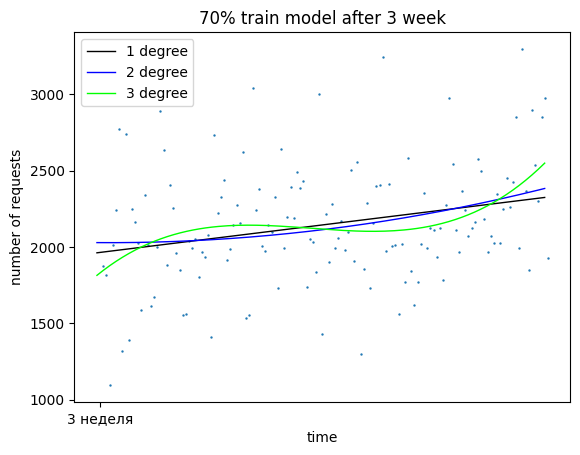

In [11]:
import matplotlib.pyplot as plt

plt.title('70% train model after 3 week')
plt.scatter(hours_data_train, requests_data_train, s=0.5)
plt.xlabel('time')
plt.ylabel('number of requests')
plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

f2x = np.linspace(train_data - 1, border_70 - 1, len(hours_data_train))

# viz. polynomial degree 1
f2y_1 = fx_1(f2x)
plt.plot(f2x, f2y_1, linewidth=1.0, color='black', label = '1 degree');

# viz. polynomial degree 2
f2y_2 = fx_2(f2x)
plt.plot(f2x, f2y_2, linewidth=1.0, color='blue', label = '2 degree');

# viz. polynomial degree 3
f2y_3 = fx_3(f2x)
plt.plot(f2x, f2y_3, linewidth=1.0, color='lime', label = '3 degree');

plt.autoscale(tight=False)
plt.legend()
plt.show()

In [12]:
# Discover dependencies MSE and RMSE of degree and persantage of train / test model

train_border = 3
final_border = 4.2

train_data  = int(train_border * 7 * 24)

final_border = int(final_border * 7 * 24)

border = train_data + 5

while border < final_border:
    hours_data_train = hours_data[train_data:border]
    requests_data_train = requests_data[train_data:border]

    persantage_test = round((final_border - border) / (final_border - train_data) * 100, 1)
    persantage_train = round(100 - persantage_test, 1)

    f2p_1, residuals, rank, sv, rcond = np.polyfit(hours_data_train, requests_data_train, 1, full=True)
    f2p_2, residuals, rank, sv, rcond = np.polyfit(hours_data_train, requests_data_train, 2, full=True)
    f2p_3, residuals, rank, sv, rcond = np.polyfit(hours_data_train, requests_data_train, 3, full=True)

    # 1 polinomial degree
    fx_1 = np.poly1d(f2p_1)
    rmse_1 = mean_squared_error(requests_data_train, fx_1(hours_data_train), squared=False)
    mse_1 = mean_squared_error(requests_data_train,  fx_1(hours_data_train), squared=True)
    mae_1 = mean_absolute_error(requests_data_train,  fx_1(hours_data_train))

    # 2 polinomial degree
    fx_2 = np.poly1d(f2p_2)
    rmse_2 = mean_squared_error(requests_data_train, fx_2(hours_data_train), squared=False)
    mse_2 = mean_squared_error(requests_data_train,  fx_2(hours_data_train), squared=True)
    mae_2 = mean_absolute_error(requests_data_train,  fx_2(hours_data_train))

    # 3 polinomial degree
    fx_3 = np.poly1d(f2p_3)
    rmse_3 = mean_squared_error(requests_data_train, fx_3(hours_data_train), squared=False)
    mse_3 = mean_squared_error(requests_data_train,  fx_3(hours_data_train), squared=True)
    mae_3 = mean_absolute_error(requests_data_train,  fx_3(hours_data_train))

    print(f'Persentage: train = {persantage_train}%, test = {persantage_test}%')
    print(f'polynomial degree 1: mse = {round(mse_1, 2)}, rmse = {round(rmse_1, 2)}, mae = {round(mae_1, 2)}')
    print(f'polynomial degree 2: mse = {round(mse_2, 2)}, rmse = {round(rmse_2, 2)}, mae = {round(mae_2, 2)}')
    print(f'polynomial degree 3: mse = {round(mse_3, 2)}, rmse = {round(rmse_3, 2)}, mae = {round(mae_3, 2)}')
    print('-----------------------')

    border += 5

Persentage: train = 2.5%, test = 97.5%
polynomial degree 1: mse = 130645.66, rmse = 361.45, mae = 284.64
polynomial degree 2: mse = 61188.16, rmse = 247.36, mae = 211.52
polynomial degree 3: mse = 61168.94, rmse = 247.32, mae = 211.52
-----------------------
Persentage: train = 5.0%, test = 95.0%
polynomial degree 1: mse = 278825.28, rmse = 528.04, mae = 430.96
polynomial degree 2: mse = 273170.86, rmse = 522.66, mae = 439.24
polynomial degree 3: mse = 268296.71, rmse = 517.97, mae = 444.0
-----------------------
Persentage: train = 7.5%, test = 92.5%
polynomial degree 1: mse = 210830.89, rmse = 459.16, mae = 357.69
polynomial degree 2: mse = 204927.01, rmse = 452.69, mae = 353.91
polynomial degree 3: mse = 203472.22, rmse = 451.08, mae = 352.53
-----------------------
Persentage: train = 10.0%, test = 90.0%
polynomial degree 1: mse = 217920.55, rmse = 466.82, mae = 386.31
polynomial degree 2: mse = 215995.28, rmse = 464.75, mae = 384.06
polynomial degree 3: mse = 185240.88, rmse = 430

### Min mse, rmse, mae:

train = 87.1%, test = 12.9%, polynomial degree 3: mse = 122567.48, rmse = 350.1, mae = 267.94